### 酶活性预测实践 Task
1. 基于 `T_R-train.csv` 数据，建立线性回归模型，计算其在 T-R-test.csv 数据的 r2 分数，可视化模型预测结果。
2. 加入多项式特征 (2次， 5次)，建立回归模型。
3. 计算多项式回归模型对测试数据进行预测 r2 分数，判断哪个模型预测更准确。
4. 可视化多项式回归模型数据预测结果，判断哪个模型预测更准确。

In [4]:
# Load the data
import pandas as pd
import numpy as np
data_train = pd.read_csv('T-R-train.csv')
data_train

,T,rate
0,46.53,2.49
1,48.14,2.56
2,50.15,2.63
3,51.36,2.69
4,52.57,2.74
5,54.18,2.80
6,56.19,2.88
7,58.58,2.92
8,61.37,2.96
9,63.34,2.95


In [5]:
# Define X_train and y_train
X_train = data_train.loc[:, 'T']
y_train = data_train.loc[:, 'rate']

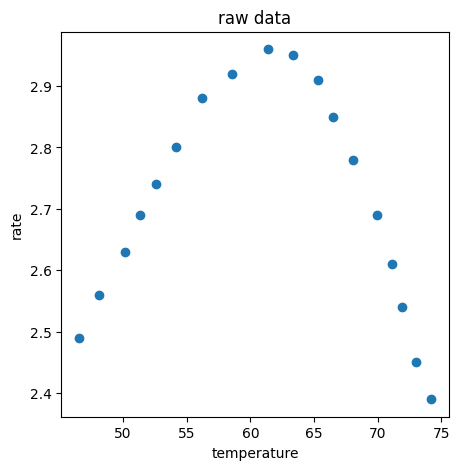

In [7]:
# Visualize the data 
%matplotlib inline
from matplotlib import pyplot as plt
fig1 = plt.figure(figsize=(5, 5))
plt.scatter(X_train, y_train)
plt.title('raw data')
plt.xlabel('temperature')
plt.ylabel('rate')
plt.show()

In [8]:
X_train = np.array(X_train).reshape(-1, 1)

In [9]:
# linear regression model prediction
from sklearn.linear_model import LinearRegression
lr1 = LinearRegression()
lr1.fit(X_train, y_train)


LinearRegression()

In [10]:
# Loda the test data
data_test = pd.read_csv('T-R-test.csv')
X_test = data_test.loc[:, 'T']
y_test = data_test.loc[:, 'rate']
data_test

,T,rate
0,45.376344,2.334559
1,52.186380,2.775735
2,61.863799,2.930147
3,73.154122,2.488971
4,78.888889,1.981618
5,82.473118,1.518382
6,43.046595,2.080882


In [11]:
# Reshape data
X_test = np.array(X_test).reshape(-1, 1)


In [13]:
# Make prediction on the training and testing data
y_train_predict = lr1.predict(X_train)
y_test_predict = lr1.predict(X_test)
from sklearn.metrics import r2_score
r2_train = r2_score(y_train, y_train_predict)
r2_test = r2_score(y_test, y_test_predict)
print('training r2:', r2_train)
print('training r2:', r2_test)

training r2: 0.01666570388698263
training r2: -0.7583363437351327


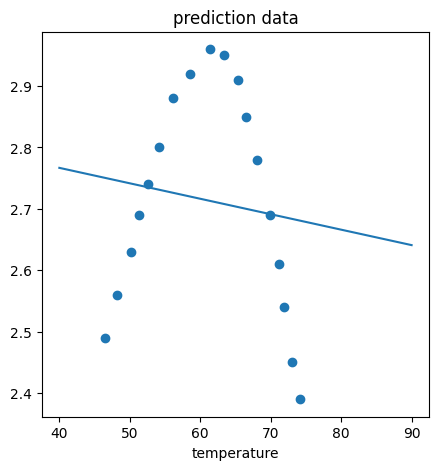

In [17]:
# Generate new data
X_range = np.linspace(40, 90, 300).reshape(-1 ,1)
y_range_predict = lr1.predict(X_range)

fig2 = plt.figure(figsize=(5, 5))
plt.plot(X_range, y_range_predict)
plt.scatter(X_train, y_train)

plt.title('prediction data')
plt.xlabel('temperature')
plt.show()


In [78]:
# 多项式模型
# Generate new features
from sklearn.preprocessing import PolynomialFeatures
poly2 = PolynomialFeatures(degree=2)
X_2_train = poly2.fit_transform(X_train)
X_2_test = poly2.transform(X_test)

poly5 = PolynomialFeatures(degree=5)
X_5_train = poly5.fit_transform(X_train)
X_5_test = poly5.transform(X_test)

print(X_5_train.shape)


(18, 6)


In [70]:
lr2 = LinearRegression()
lr2.fit(X__train, y_train)

LinearRegression()

In [61]:
y_2_train_predict = lr2.predict(X_2_train)
y_2_test_predict = lr2.predict(X_2_test)
r2_2_train = r2_score(y_train, y_2_train_predict)
r2_2_test = r2_score(y_test, y_2_test_predict)

In [79]:
lr5 = LinearRegression()
lr5.fit(X_5_train, y_train)


LinearRegression()

In [72]:
y_5_train_predict = lr5.predict(X_5_train)
y_5_test_predict = lr5.predict(X_5_test)
r2_5_train = r2_score(y_train, y_5_train_predict)
r2_5_test = r2_score(y_test, y_5_test_predict)

In [73]:
print('tranining r2_2:', r2_2_train)
print('test r2_2:', r2_2_test)
print('tranining r2_5:', r2_5_train)
print('test r2_5:', r2_5_test)

tranining r2_2: 0.9700515400689428
test r2_2: 0.9963954556468668
tranining r2_5: 0.9978527267330739
test r2_5: 0.5437891772795399


In [67]:
# Visualization data
X_2_range = np.linspace(40, 90, 300).reshape(-1, 1)
X_2_range = poly2.transform(X_2_range)
y_2_range_predict = lr2.predict(X_2_range)


In [77]:
X_5_range = np.linspace(40, 90, 300).reshape(-1, 1)
X_5_range = poly5.transform(X_5_range)
y_5_range_predict = lr5.predict(X_5_range)


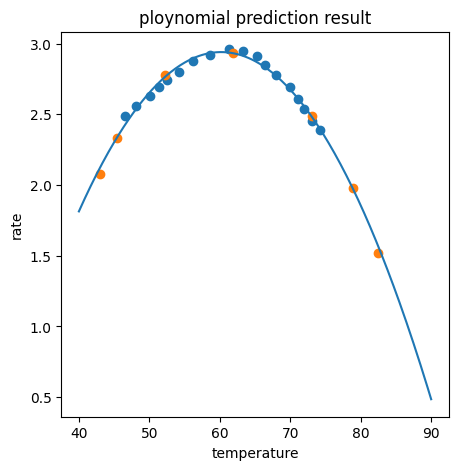

In [74]:
fig3 = plt.figure(figsize=(5,5))
plt.plot(X_range, y_2_range_predict)
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)

plt.title("ploynomial prediction result")
plt.xlabel('temperature')
plt.ylabel('rate')
plt.show()

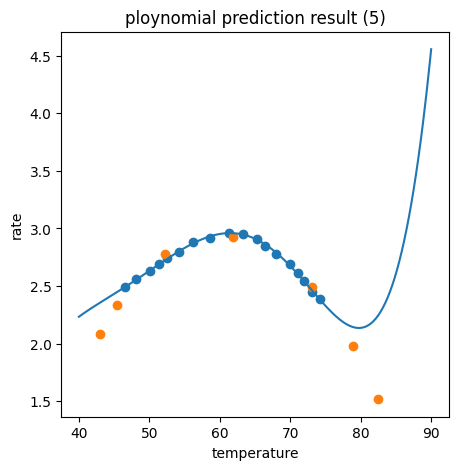

In [80]:
fig4 = plt.figure(figsize=(5,5))
plt.plot(X_range, y_5_range_predict)
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)

plt.title("ploynomial prediction result (5)")
plt.xlabel('temperature')
plt.ylabel('rate')
plt.show()

### 酶活性预测实战 Summary
1. 通过建立二阶多项式回归模型，对酶活性实现了一个好的预测，无论针对训练或测试数据都到一个高的 r2 分数；
2. 通过建立线性回归，五阶多项式回归模型，发现存在过拟合或欠拟合情况。过拟合情决。对于训练数据 r2 分数（预测准确），但对预测数据 r2 分数低（预测不准确）。
3. 无论时通过 r2 分数，或是可视化模型结果，都可以发现二阶多项式回归模型效果最好。
4. 核心算法参考链接：https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression